In [2]:
# from plate_planner.plate import Well, Plate, QCPlate
# from plate_planner.study import Study
# from plate_planner.logger import logger
from plate import Plate
from logger import logger
import pandas as pd
import numpy as np
import logging
from pathlib import Path

from dataclasses import asdict

logger.setLevel(logging.DEBUG)

ModuleNotFoundError: No module named 'plate_planner'

In [ ]:
p = Plate(plate_id=3)
p.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.


,name,plate_id,coordinate,index,rgb_color
0,A1,3,"(0, 0)",0,"(1, 1, 1)"
1,A2,3,"(0, 1)",1,"(1, 1, 1)"
2,A3,3,"(0, 2)",2,"(1, 1, 1)"
3,A4,3,"(0, 3)",3,"(1, 1, 1)"
4,A5,3,"(0, 4)",4,"(1, 1, 1)"
...,...,...,...,...,...
91,H8,3,"(7, 7)",91,"(1, 1, 1)"
92,H9,3,"(7, 8)",92,"(1, 1, 1)"
93,H10,3,"(7, 9)",93,"(1, 1, 1)"
94,H11,3,"(7, 10)",94,"(1, 1, 1)"


In [ ]:
qcp = QCPlate(QC_config="./data/plate_config_dynamic.toml")

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ./data/plate_config_dynamic.toml
[   DEBUG] --- {'QC': {'start_with_QC_round': True, 'run_QC_after_n_specimens': 11, 'names': {'EC': 'EC: External_Control_(matrix)', 'PB': 'PB: Paper_Blank', 'PO': 'PO: Pooled_specimens'}, 'patterns': {'then_alternating': [['EC', 'PB'], ['EC', 'PO']]}}}
[    INFO] --- Creating dynamic plate layout with QC samples.
[   DEBUG] --- Setting up dynamic QC scheme from config file
[   DEBUG] --- Round 1: ['EC', 'PB']
[   DEBUG] --- Round 2: ['EC', 'PO']
[   DEBUG] --- Round 3: ['EC', 'PB']
[   DEBUG] --- Round 4: ['EC', 'PO']
[   DEBUG] --- Round 5: ['EC', 'PB']
[   DEBUG] --- Round 6: ['EC', 'PO']
[   DEBUG] --- Round 7: ['EC', 'PB']
[   DEBUG] --- Round 8: ['EC', 'PO']
[   DEBUG] --- Well A1: {'QC': True, 'sample_code': 'EC', 'sample_type': 'EC: External_Control_(matrix)', 'sample_name': 'EC1'}
[   DEBUG] --- Well A2: {'QC': True, 'sample_code': 'PB', 'sample_ty

In [ ]:
qcp.capacity

80

In [ ]:
qcp._index_to_coordinates_map[0]

(0, 0)

In [ ]:
w = Well(metadata={"nickname": "kalle", "sample": "plasma"}, index=1)
w.as_dict()

{'name': 'A1',
 'plate_id': 1,
 'coordinate': (0, 0),
 'index': 1,
 'rgb_color': (1, 1, 1),
 'nickname': 'kalle',
 'sample': 'plasma'}

In [ ]:
w.index


1

In [ ]:
p[0].as_dict()

{'name': 'A1',
 'plate_id': 3,
 'coordinate': (0, 0),
 'index': 0,
 'rgb_color': (1, 1, 1)}

In [ ]:

print(p)

Plate ID: 3
Dimensions: 8 rows x 12 columns
Plate Layout (Well Names):
[['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12']
 ['B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'B8' 'B9' 'B10' 'B11' 'B12']
 ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12']
 ['D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12']
 ['E1' 'E2' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8' 'E9' 'E10' 'E11' 'E12']
 ['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10' 'F11' 'F12']
 ['G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'G10' 'G11' 'G12']
 ['H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9' 'H10' 'H11' 'H12']]


In [ ]:
p[23]

Well(name='B12', plate_id=3, coordinate=(1, 11), index=23, rgb_color=(1, 1, 1), metadata={})

In [ ]:
p["B12"]

Well(name='B12', plate_id=3, coordinate=(1, 11), index=23, rgb_color=(1, 1, 1), metadata={})

In [ ]:
p[(1,11)]

Well(name='B12', plate_id=3, coordinate=(1, 11), index=23, rgb_color=(1, 1, 1), metadata={})

In [ ]:
organs = ["liver", "lung", "stomach", "kidney", "eye", "brain", "spleen", "bone", "muscle", "skin"]
import random
for ind, well in enumerate(p):
    well.metadata["organ"] = random.sample(organs, 1)[0]

In [ ]:
p.as_dataframe()

,name,plate_id,coordinate,index,rgb_color,organ
0,A1,3,"(0, 0)",0,"(1, 1, 1)",lung
1,A2,3,"(0, 1)",1,"(1, 1, 1)",liver
2,A3,3,"(0, 2)",2,"(1, 1, 1)",muscle
3,A4,3,"(0, 3)",3,"(1, 1, 1)",liver
4,A5,3,"(0, 4)",4,"(1, 1, 1)",muscle
...,...,...,...,...,...,...
91,H8,3,"(7, 7)",91,"(1, 1, 1)",spleen
92,H9,3,"(7, 8)",92,"(1, 1, 1)",liver
93,H10,3,"(7, 9)",93,"(1, 1, 1)",skin
94,H11,3,"(7, 10)",94,"(1, 1, 1)",liver


In [ ]:
p.get_metadata_as_numpy_array("rgb_color")

array([[(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1

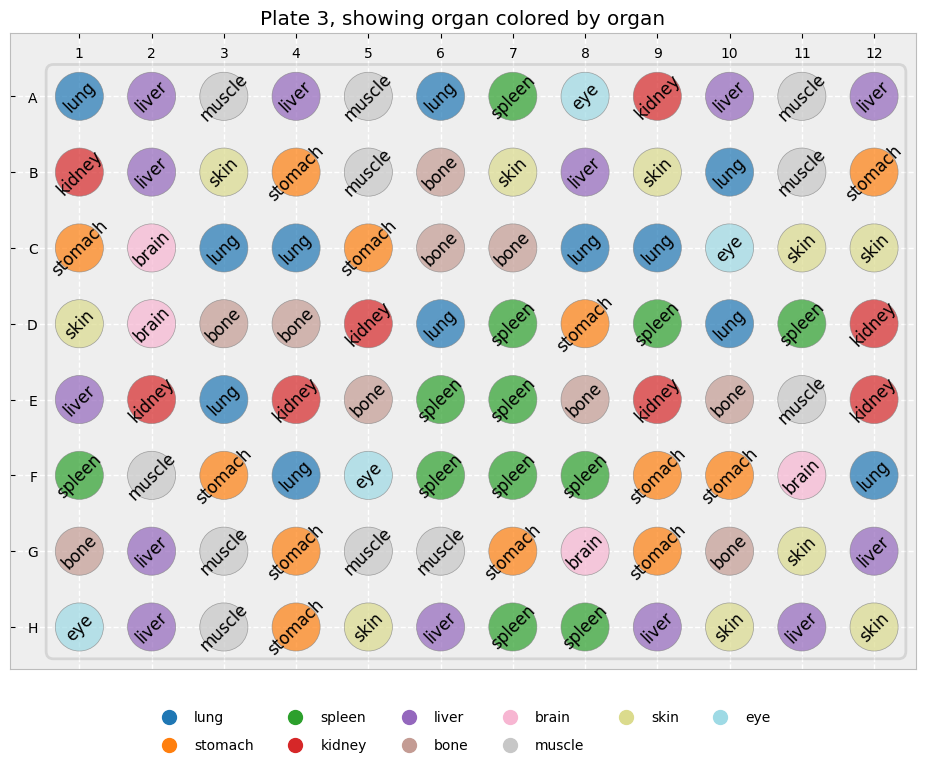

In [ ]:
fig = p.as_figure(color_metadata_key="organ", annotation_metadata_key="organ", rotation=45, fontsize=12)

In [ ]:
p.to_file("./")

[    INFO] --- Writing to file:
	plate_3.csv


In [ ]:
study_sample_file = Path("./data/fake_case_control_Npairs_523_Ngroups_5.csv")
qc_scheme_file = Path("./config/plate_config.toml")

In [ ]:
test = pd.read_csv(study_sample_file)
test

,Unnamed: 0,pair_ID,specimen_ID,object,date_of_birth,barcode,organ
0,0,0,888,Control,1993-12-13,95388762,Parotid glands
1,1,0,889,Case,1993-12-13,66794295,Parotid glands
2,2,1,962,Control,2006-06-22,69215322,Tendons
3,3,1,963,Case,2006-06-22,77642424,Tendons
4,4,2,261,Control,1999-05-06,30225664,Parotid glands
...,...,...,...,...,...,...,...
1041,1041,520,66,Case,1991-08-29,772655,Mammary glands
1042,1042,521,558,Control,1993-03-21,49757491,Parotid glands
1043,1043,521,559,Case,1993-03-24,46022059,Parotid glands
1044,1044,522,710,Control,2002-03-23,73437017,Mammary glands


In [ ]:
test_study = Study(study_name="cancer")
test_study.load_specimen_records(study_sample_file, sample_group_id_column="pair_ID", sample_id_column="specimen_ID")
df_study = test_study.specimen_records_df
df_study

[   DEBUG] --- Loading records file: data/fake_case_control_Npairs_523_Ngroups_5.csv
[   DEBUG] --- Importing csv file.
[   DEBUG] --- 1046 specimens in file
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ
[   DEBUG] --- Sorting records in ascending order based on column 'specimen_ID'


,Unnamed: 0,pair_ID,specimen_ID,object,date_of_birth,barcode,organ
310,310,155,2,Control,1984-01-04,29193530,Kidneys
311,311,155,3,Case,1984-01-09,10515761,Kidneys
586,586,293,4,Control,1992-11-26,28260035,Descending colon
587,587,293,5,Case,1992-11-29,95988511,Descending colon
270,270,135,6,Control,1983-11-01,16386761,Descending colon
...,...,...,...,...,...,...,...
775,775,387,1045,Case,1998-01-20,67607426,Mammary glands
746,746,373,1045,Control,1983-02-05,95164618,Tendons
747,747,373,1046,Case,1983-02-05,95431215,Tendons
220,220,110,1046,Control,2007-05-06,73720768,Mammary glands


In [ ]:
test_study.randomize_order(case_control=True, reproducible=False)
df = test_study.specimen_records_df

[    INFO] --- Randomly permuting group order (samples within group unchanged) using variable 'pair_ID'
[   DEBUG] --- Creating multiindex dataframe


In [ ]:
test_study.specimen_records_df

,index_before_permutation,pair_ID,Unnamed: 0,specimen_ID,object,date_of_birth,barcode,organ
0,328,164,328,851,Control,1991-05-27,60713049,Descending colon
1,329,164,329,852,Case,1991-05-27,68887858,Descending colon
2,788,394,788,1006,Control,1988-12-23,65562888,Descending colon
3,789,394,789,1007,Case,1988-12-25,91682208,Descending colon
4,740,370,740,9,Control,1987-12-05,32676433,Descending colon
...,...,...,...,...,...,...,...,...
1041,53,26,53,669,Case,1996-11-06,22813503,Tendons
1042,330,165,330,15,Control,1993-03-06,23811379,Mammary glands
1043,331,165,331,16,Case,1993-03-10,35177661,Mammary glands
1044,220,110,220,1046,Control,2007-05-06,73720768,Mammary glands


In [ ]:
test_study._column_with_group_index

'pair_ID'

In [ ]:
test_study.distribute_samples_to_plates(plate_layout=qcp)
test_study.to_dataframe()

[   DEBUG] --- Adding 80 samples to plate 1
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 2
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 3
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 4
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 5
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 6
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 7
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 8
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 9
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 10
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Addi

,name,plate_id,coordinate,index,rgb_color,QC,sample_code,sample_type,sample_name,index_before_permutation,pair_ID,Unnamed: 0,specimen_ID,object,date_of_birth,barcode,organ
0,A1,1,"(0, 0)",0,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,1,"(0, 1)",1,"(1, 1, 1)",True,PB,PB: Paper_Blank,PB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,1,"(0, 2)",2,"(1, 1, 1)",False,S,Specimen,S1,328,164,328,851,Control,1991-05-27,60713049,Descending colon
3,A4,1,"(0, 3)",3,"(1, 1, 1)",False,S,Specimen,S2,329,164,329,852,Case,1991-05-27,68887858,Descending colon
4,A5,1,"(0, 4)",4,"(1, 1, 1)",False,S,Specimen,S3,788,394,788,1006,Control,1988-12-23,65562888,Descending colon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,H8,14,"(7, 7)",91,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,H9,14,"(7, 8)",92,"(1, 1, 1)",True,PO,PO: Pooled_specimens,PO4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,H10,14,"(7, 9)",93,"(1, 1, 1)",False,S,Specimen,S1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,H11,14,"(7, 10)",94,"(1, 1, 1)",False,S,Specimen,S2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

test_study.to_dataframe()

,name,plate_id,coordinate,index,rgb_color,QC,sample_code,sample_type,sample_name,index_before_permutation,pair_ID,Unnamed: 0,specimen_ID,object,date_of_birth,barcode,organ
0,A1,1,"(0, 0)",0,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,1,"(0, 1)",1,"(1, 1, 1)",True,PB,PB: Paper_Blank,PB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,1,"(0, 2)",2,"(1, 1, 1)",False,S,Specimen,S1,328,164,328,851,Control,1991-05-27,60713049,Descending colon
3,A4,1,"(0, 3)",3,"(1, 1, 1)",False,S,Specimen,S2,329,164,329,852,Case,1991-05-27,68887858,Descending colon
4,A5,1,"(0, 4)",4,"(1, 1, 1)",False,S,Specimen,S3,788,394,788,1006,Control,1988-12-23,65562888,Descending colon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,H8,14,"(7, 7)",91,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,H9,14,"(7, 8)",92,"(1, 1, 1)",True,PO,PO: Pooled_specimens,PO4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,H10,14,"(7, 9)",93,"(1, 1, 1)",False,S,Specimen,S1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,H11,14,"(7, 10)",94,"(1, 1, 1)",False,S,Specimen,S2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_study[0]

QCPlate((8,12), plate_id=1)

In [ ]:
print(test_study[0])

Plate ID: 1
Dimensions: 8 rows x 12 columns
Plate Layout (Sample Codes):
[['EC' 'PB' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'EC' 'PO' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'EC' 'PB' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'EC' 'PO' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'S' 'EC' 'PB' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'S' 'S' 'EC' 'PO' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'S' 'S' 'S' 'EC' 'PB' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'S' 'S' 'S' 'S' 'EC' 'PO' 'S' 'S' 'S']]


In [ ]:
test_study.to_dataframe().head(20)

,name,plate_id,coordinate,index,rgb_color,QC,sample_code,sample_type,sample_name,index_before_permutation,pair_ID,Unnamed: 0,specimen_ID,object,date_of_birth,barcode,organ
0,A1,1,"(0, 0)",0,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,1,"(0, 1)",1,"(1, 1, 1)",True,PB,PB: Paper_Blank,PB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,1,"(0, 2)",2,"(1, 1, 1)",False,S,Specimen,S1,328,164,328,851,Control,1991-05-27,60713049,Descending colon
3,A4,1,"(0, 3)",3,"(1, 1, 1)",False,S,Specimen,S2,329,164,329,852,Case,1991-05-27,68887858,Descending colon
4,A5,1,"(0, 4)",4,"(1, 1, 1)",False,S,Specimen,S3,788,394,788,1006,Control,1988-12-23,65562888,Descending colon
5,A6,1,"(0, 5)",5,"(1, 1, 1)",False,S,Specimen,S4,789,394,789,1007,Case,1988-12-25,91682208,Descending colon
6,A7,1,"(0, 6)",6,"(1, 1, 1)",False,S,Specimen,S5,740,370,740,9,Control,1987-12-05,32676433,Descending colon
7,A8,1,"(0, 7)",7,"(1, 1, 1)",False,S,Specimen,S6,741,370,741,10,Case,1987-12-07,31534246,Descending colon
8,A9,1,"(0, 8)",8,"(1, 1, 1)",False,S,Specimen,S7,728,364,728,581,Control,1991-06-25,74324651,Descending colon
9,A10,1,"(0, 9)",9,"(1, 1, 1)",False,S,Specimen,S8,729,364,729,582,Case,1991-06-28,44258436,Descending colon


In [ ]:
test_study.sort_records_within_groups(sortby_column="object")
test_study.to_dataframe()

[    INFO] --- Sorting samples within pair_ID by object


,name,plate_id,coordinate,index,rgb_color,QC,sample_code,sample_type,sample_name,index_before_permutation,pair_ID,Unnamed: 0,specimen_ID,object,date_of_birth,barcode,organ
0,A1,1,"(0, 0)",0,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,1,"(0, 1)",1,"(1, 1, 1)",True,PB,PB: Paper_Blank,PB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,1,"(0, 2)",2,"(1, 1, 1)",False,S,Specimen,S1,328,164,328,851,Control,1991-05-27,60713049,Descending colon
3,A4,1,"(0, 3)",3,"(1, 1, 1)",False,S,Specimen,S2,329,164,329,852,Case,1991-05-27,68887858,Descending colon
4,A5,1,"(0, 4)",4,"(1, 1, 1)",False,S,Specimen,S3,788,394,788,1006,Control,1988-12-23,65562888,Descending colon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,H8,14,"(7, 7)",91,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,H9,14,"(7, 8)",92,"(1, 1, 1)",True,PO,PO: Pooled_specimens,PO4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,H10,14,"(7, 9)",93,"(1, 1, 1)",False,S,Specimen,S1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,H11,14,"(7, 10)",94,"(1, 1, 1)",False,S,Specimen,S2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_study.to_layout_lists()

[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/cancer_plate_1.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/cancer_plate_2.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/cancer_plate_3.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/cancer_plate_4.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/cancer_plate_5.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/cancer_plate_6.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/cancer_plate_7.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/cancer_plate_8.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/cancer_plate_9.csv
[    INFO] --- Writ

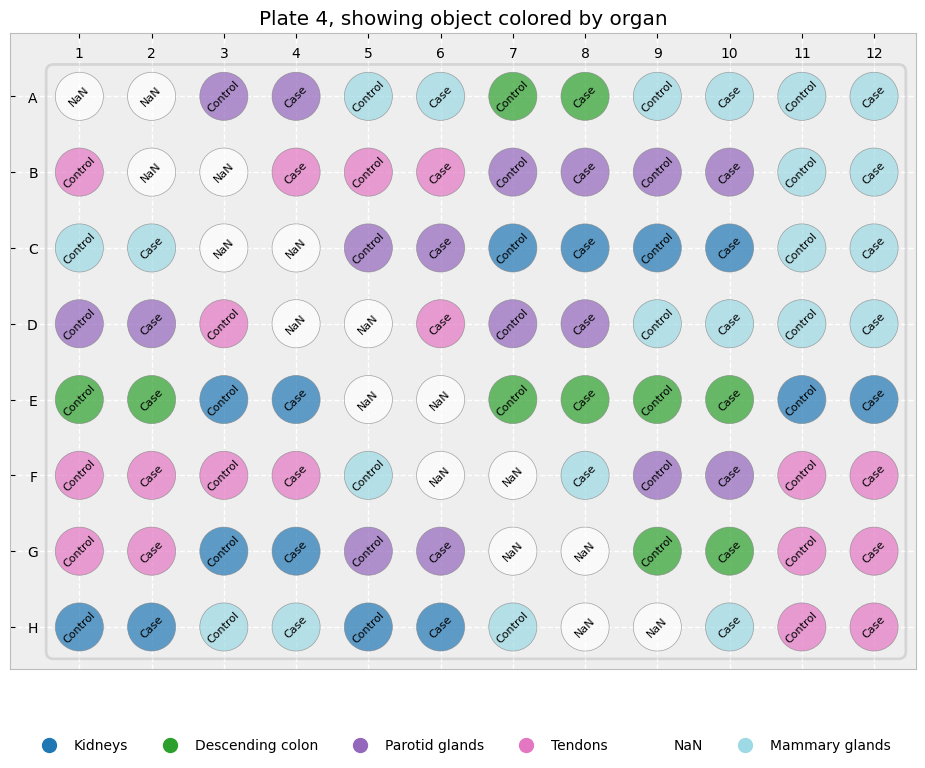

In [ ]:
fig = test_study[3].as_figure(color_metadata_key="organ", annotation_metadata_key="object", rotation=45, fontsize=8)

In [ ]:
test_study.to_layout_figures(annotation_metadata_key="object", color_metadata_key="organ", file_format="png")

TypeError: Plate.as_figure() got an unexpected keyword argument 'format'